# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Building a Student Intervention System to prevent dropout school.

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression for school dropout

*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

## Answer: 

This project is a classification problem in the field of supervised learning, aimed at identifying students who need early intervention before they are at risk of droping out. The nature of what we are trying to predict, whether or not a student needs early intervention, is categorical (binary): students need intervention (yes) or do not (no). Unlike regression problems, which predict continuous outcomes such as grade averages, our goal is to categorize students into two distinct groups, making it a classification problem.







## Data Analysis

Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

the data give us these idea on the student and we can resoning on it : 

Demographic Information, Family Background, Educational Details, Study Habits and Support, Lifestyle and Health and  School Attendance and Performance. All these aspect, we can predcit if the student need intervention or not.

In [20]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print("Student data read successfully!")

Student data read successfully!


In [21]:
student_data.head


<bound method NDFrame.head of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... internet rom

In [22]:
# Display the list of columns
print(student_data.columns)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')


# DATA Preprocessing 

In [23]:
import numpy as np
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


X = student_data.drop('passed', axis=1)  # drop the target to isolate features
y = student_data['passed'].apply(lambda x: 1 if x == 'yes' else 0)  # encode the target variable



In [24]:
# Identifying categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns



In [25]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])



In [26]:

# Preprocessing for categorical data: fill missing values with the most frequent value and apply one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])



In [27]:
# preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

print("Preprocessing complete. Data ready for model training.")

Preprocessing complete. Data ready for model training.


# Explarotory analysis DATA

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')


print("Summary Statistics of Numerical Features:")
print(student_data[numerical_cols].describe())

# Compute the distribution of the categorical columns
print("\nDistribution of Categorical Features:")
print(student_data[categorical_cols].apply(lambda x: x.value_counts()).T.stack())


Summary Statistics of Numerical Features:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139 

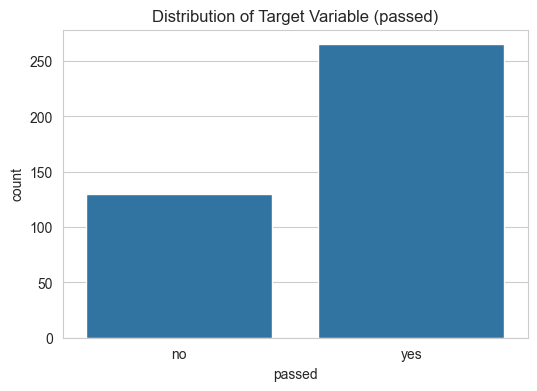

In [34]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='passed', data=student_data)
plt.title('Distribution of Target Variable (passed)')
plt.show()

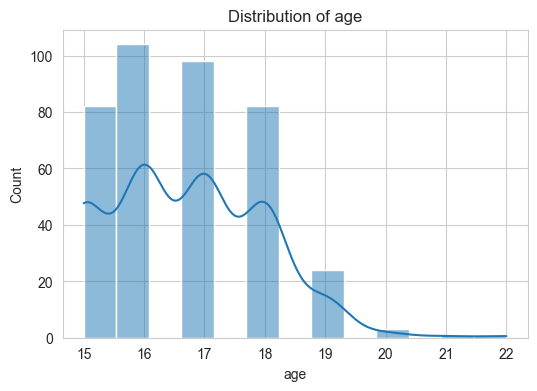

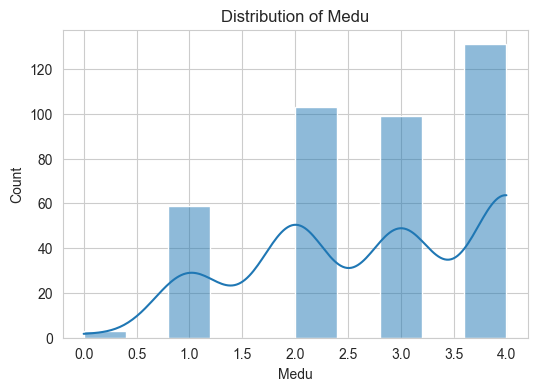

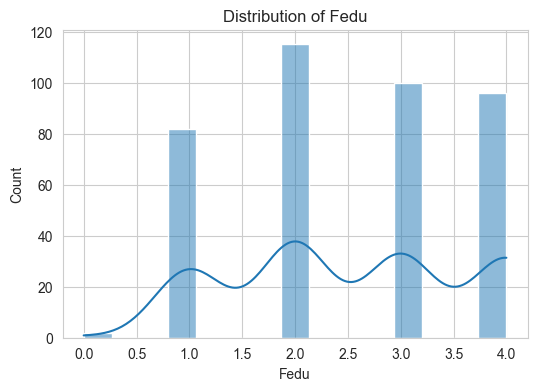

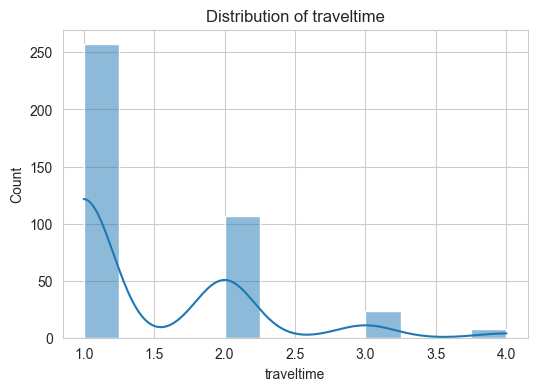

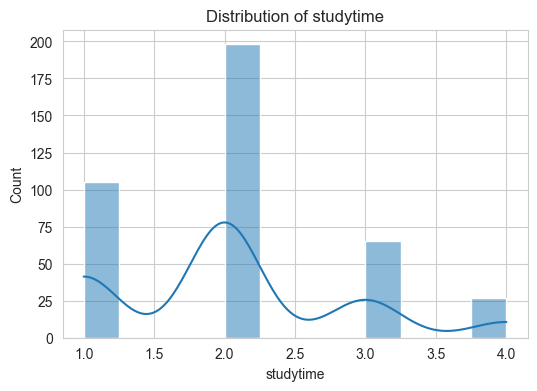

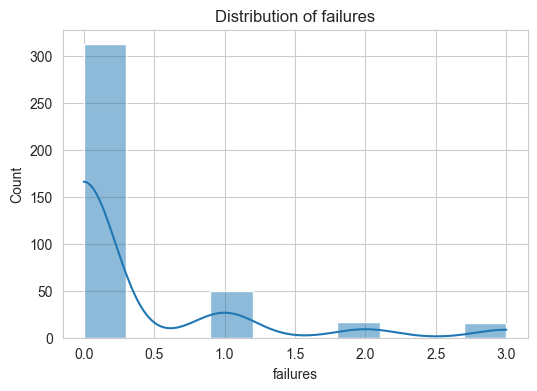

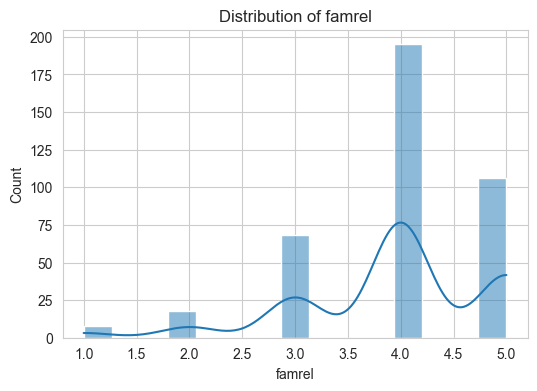

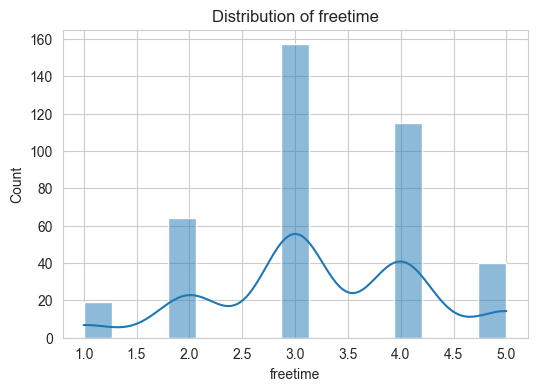

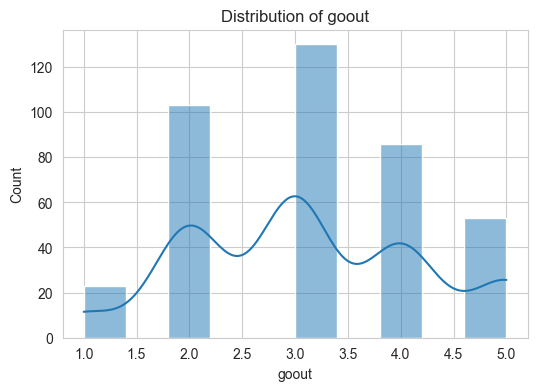

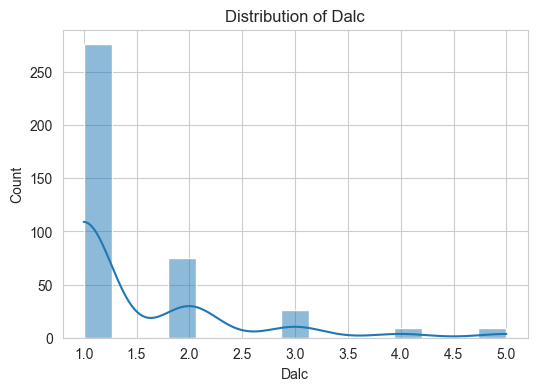

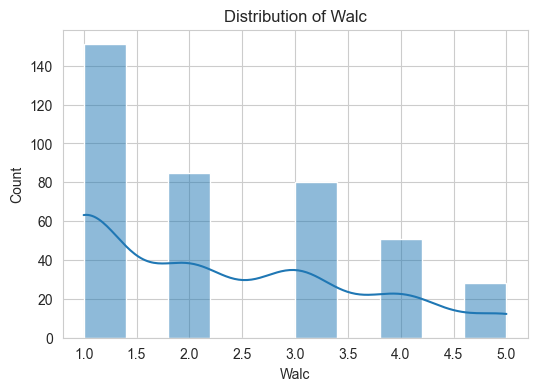

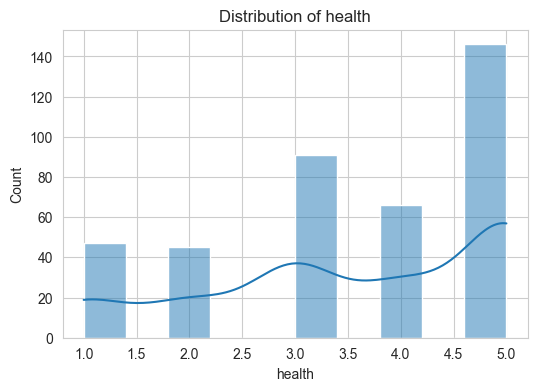

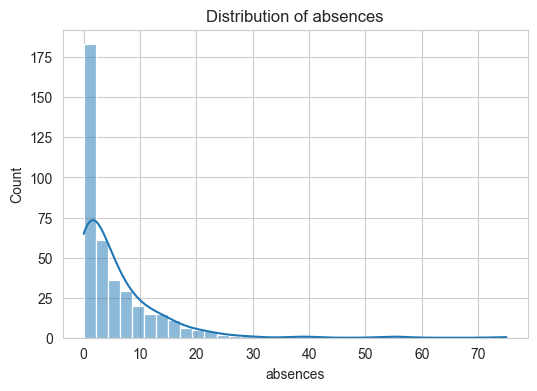

In [35]:
# Visualize the distribution of numerical features
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(student_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


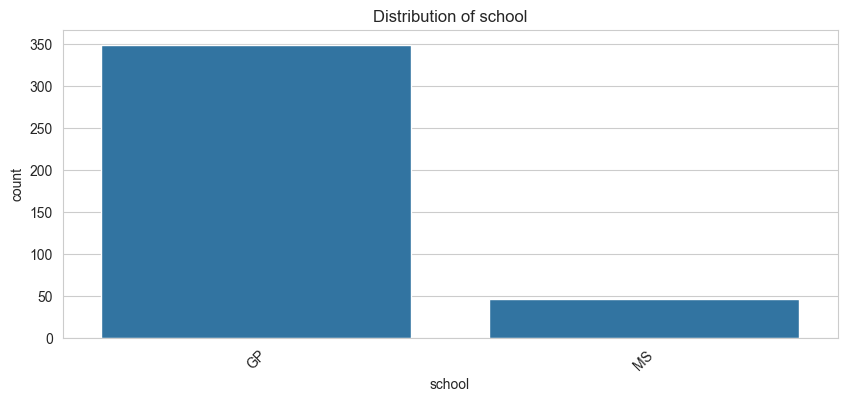

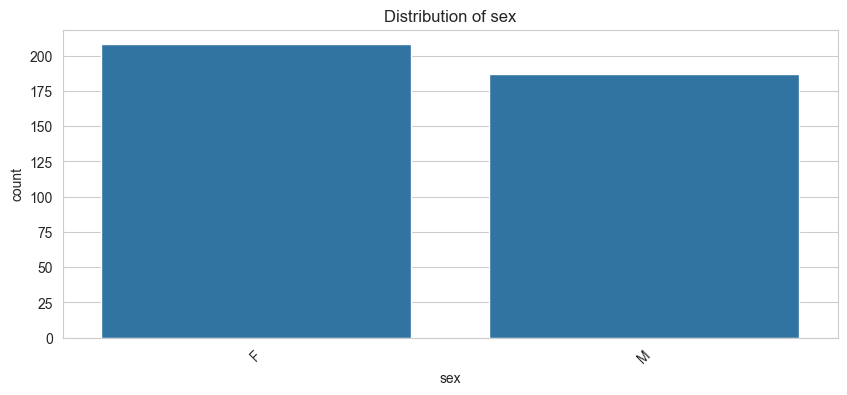

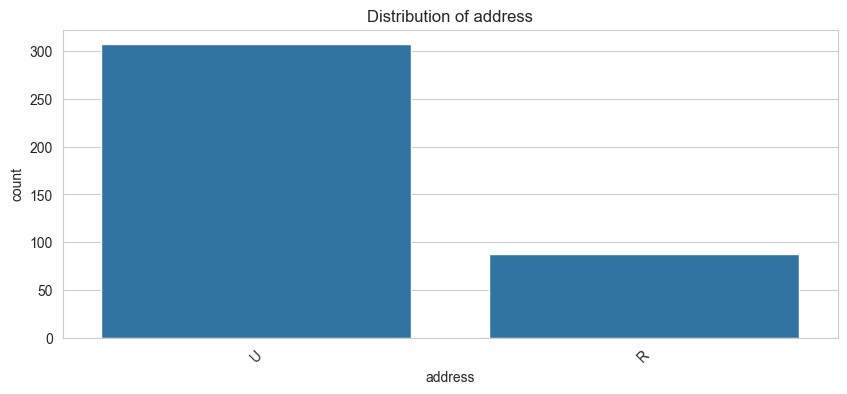

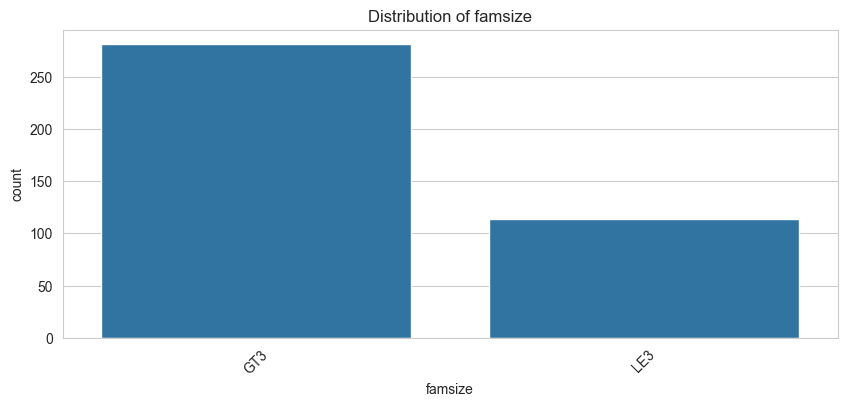

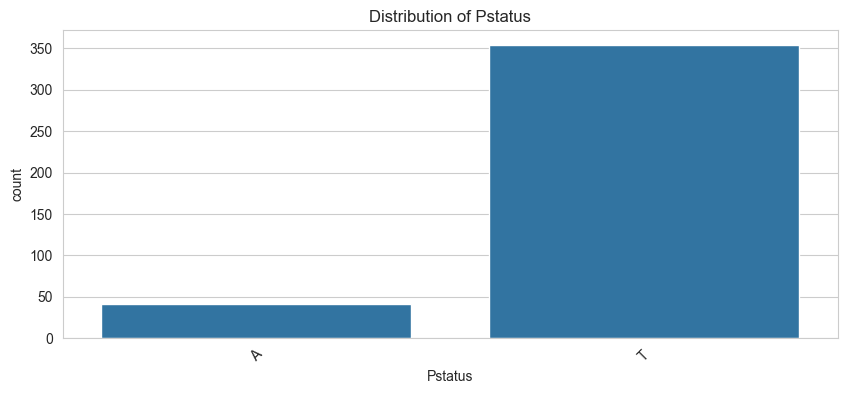

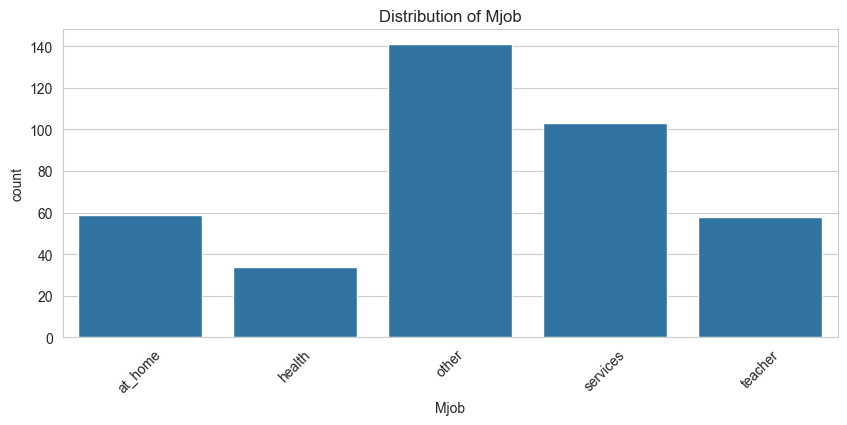

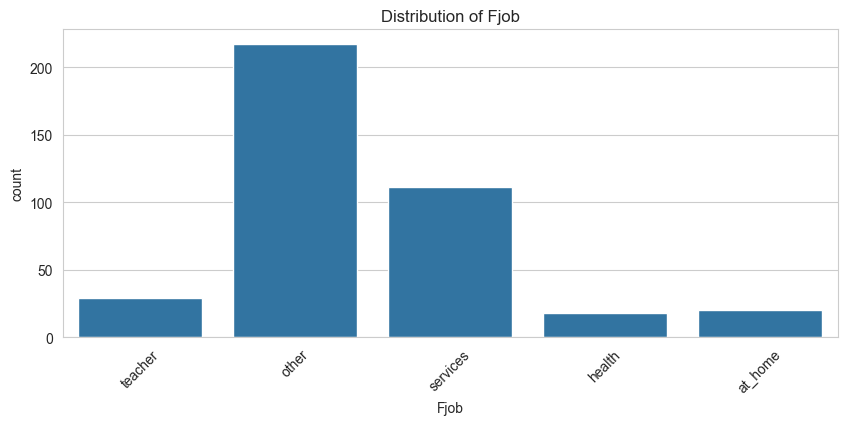

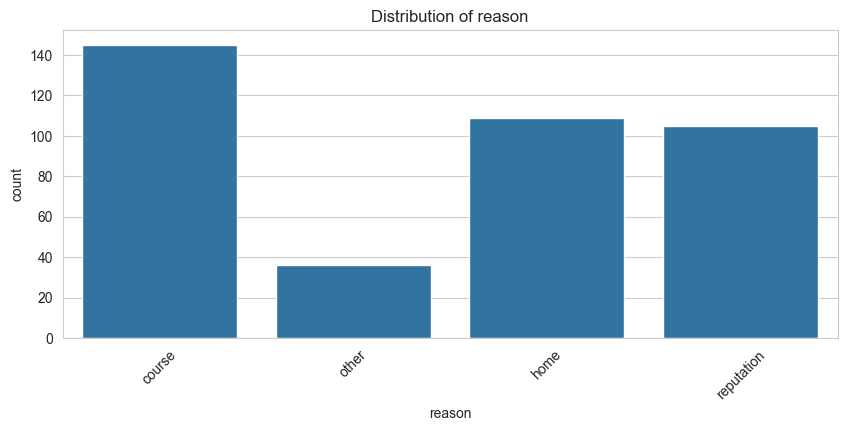

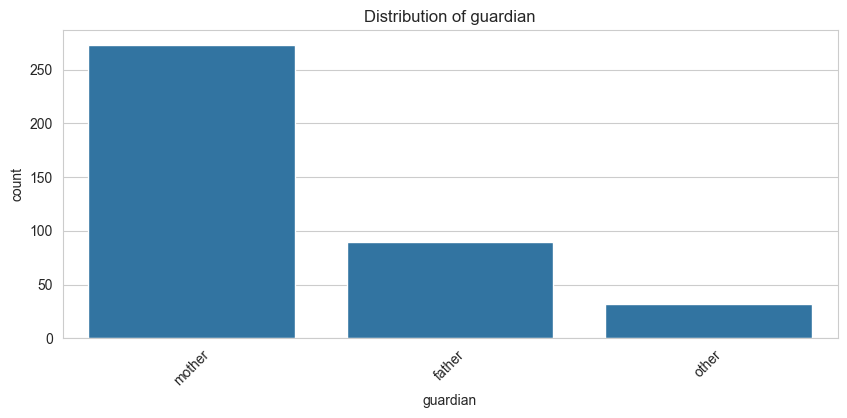

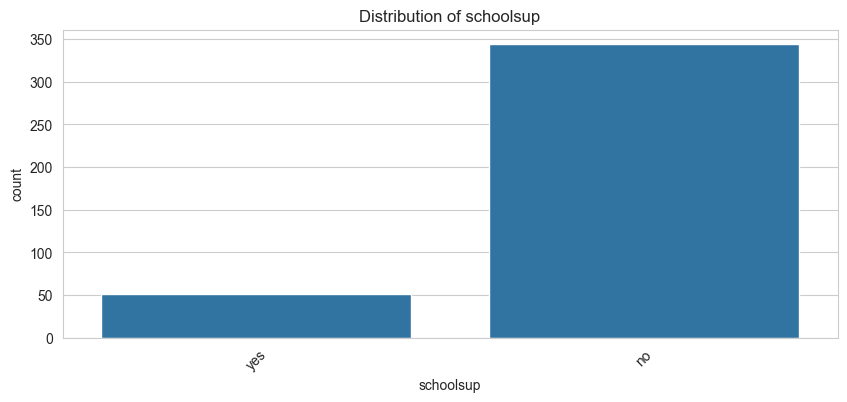

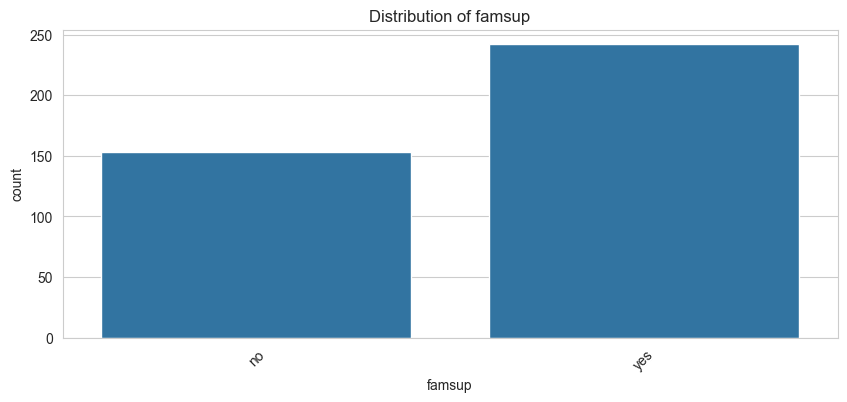

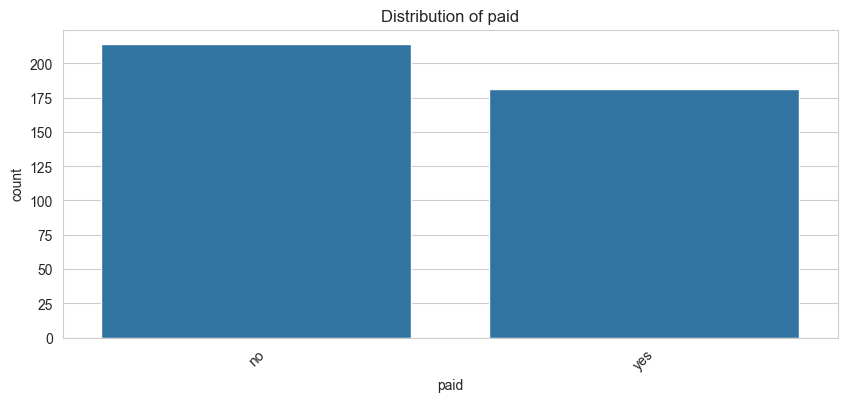

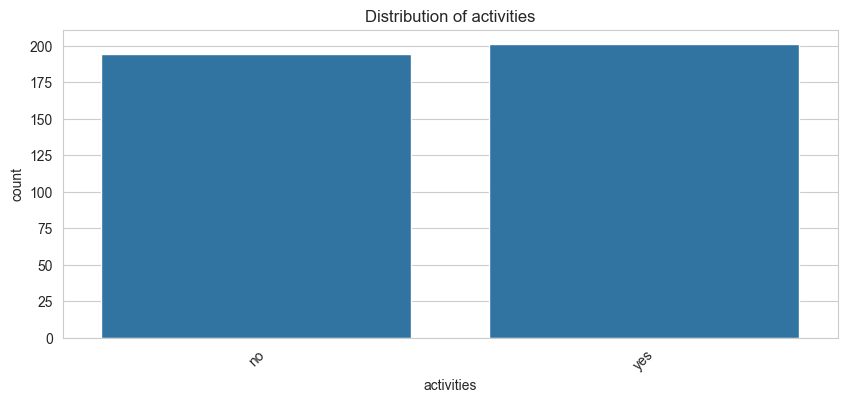

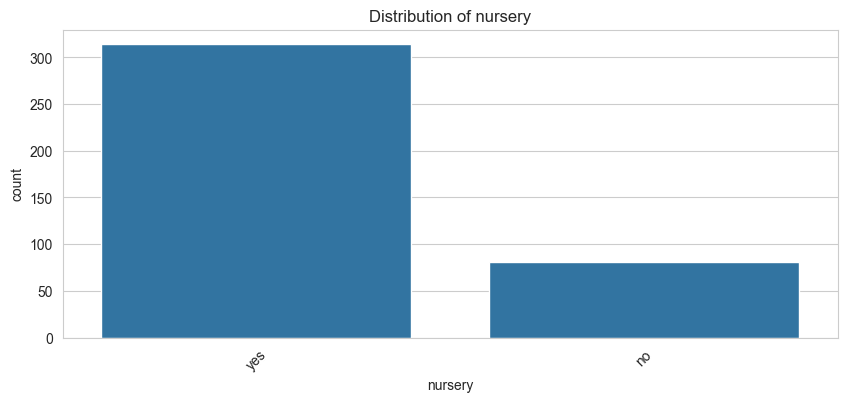

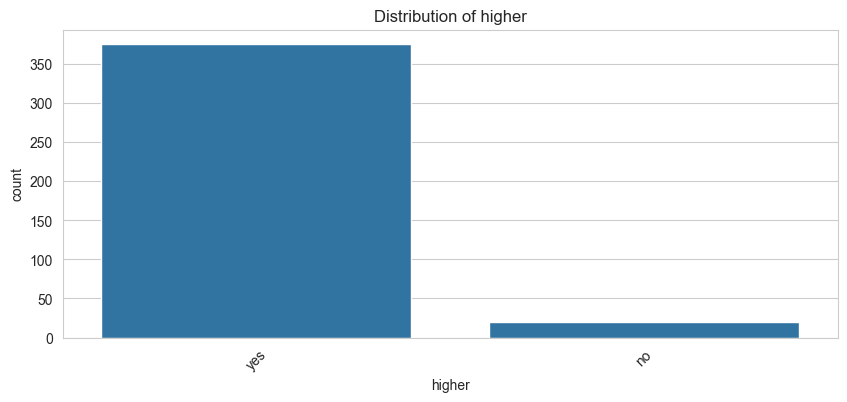

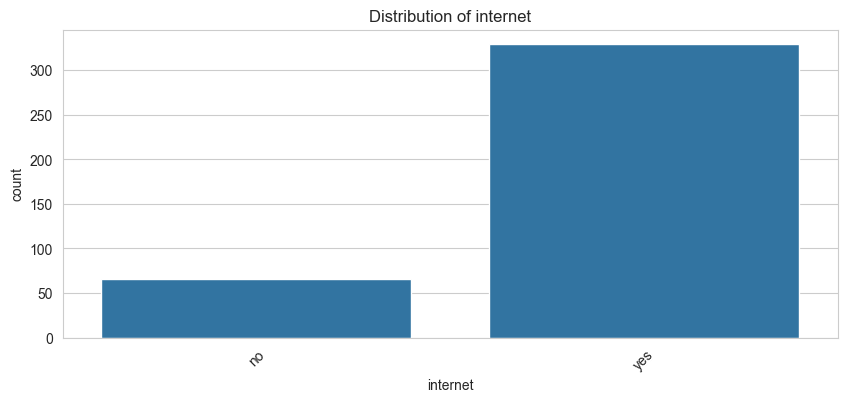

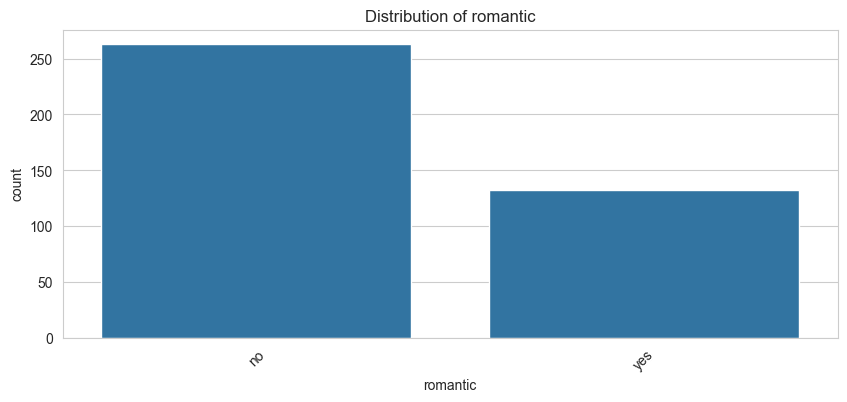

In [36]:
# Visualize the distribution of categorical features
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=student_data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

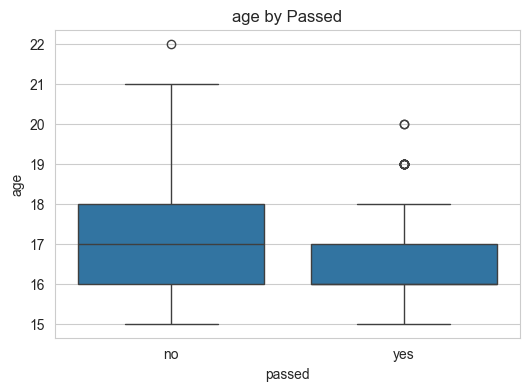

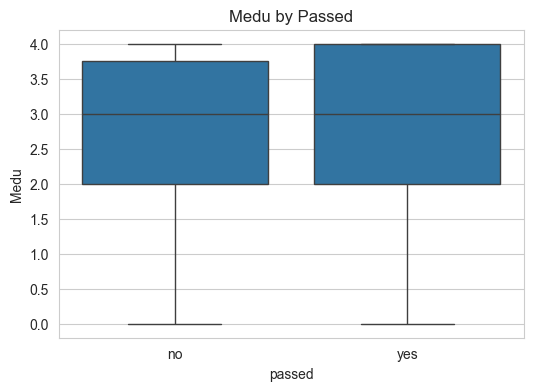

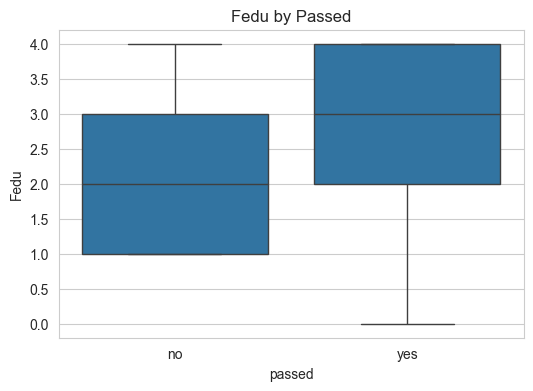

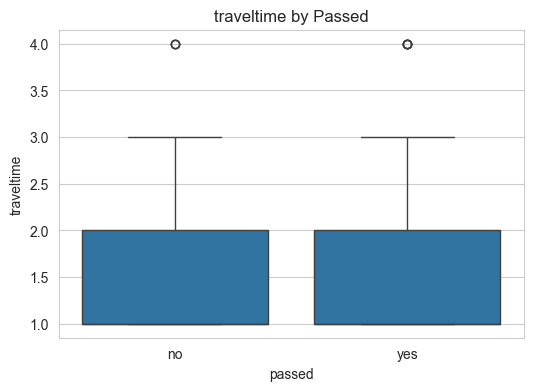

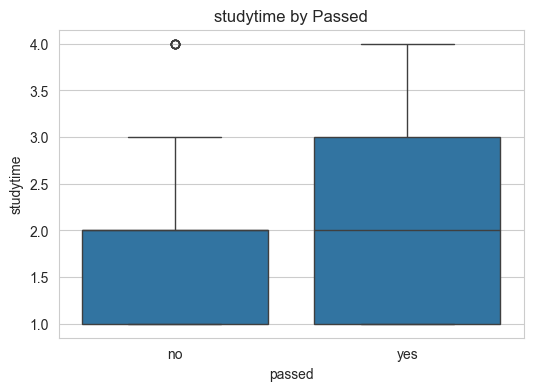

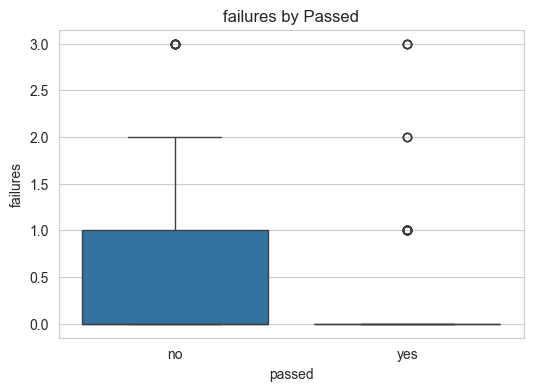

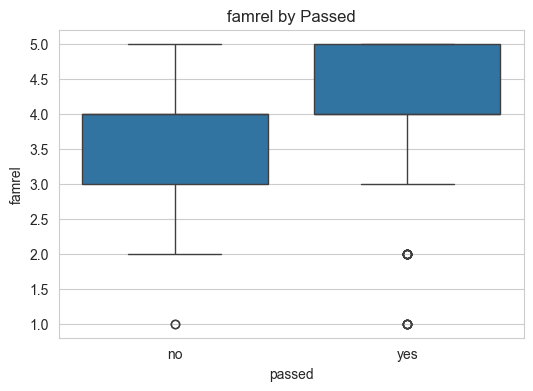

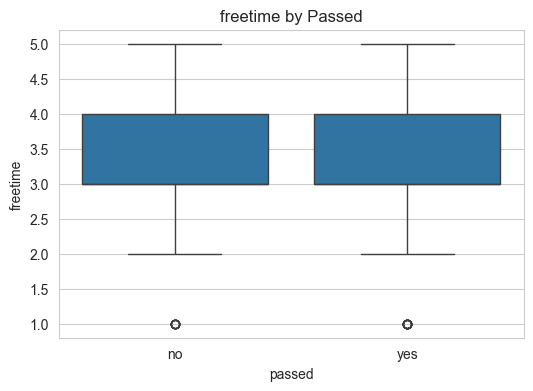

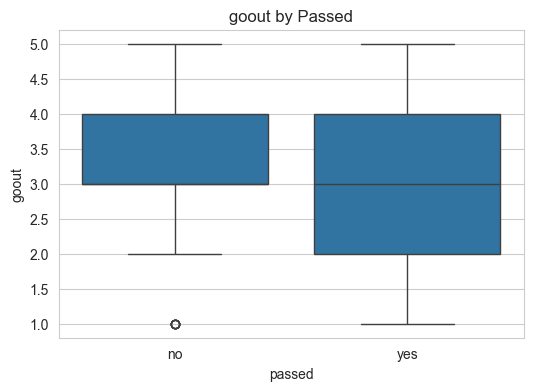

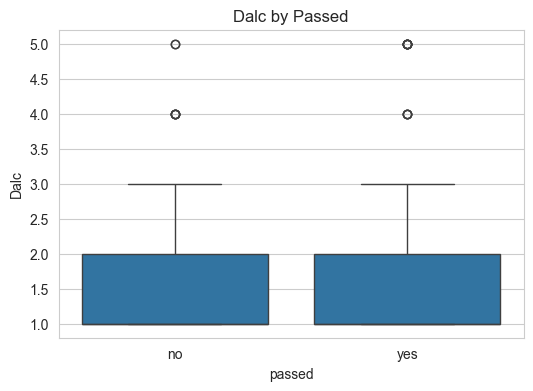

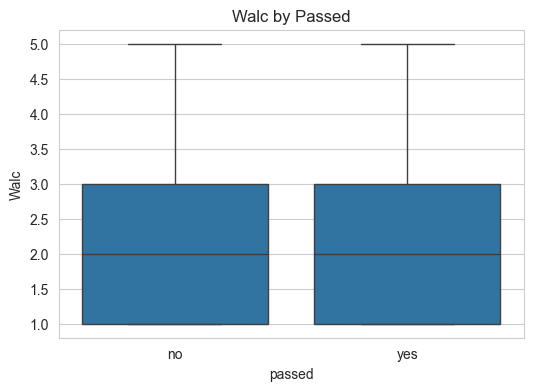

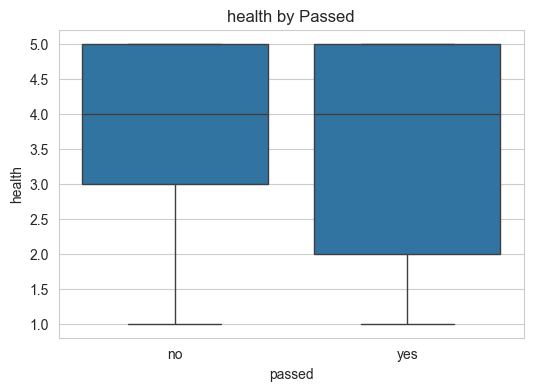

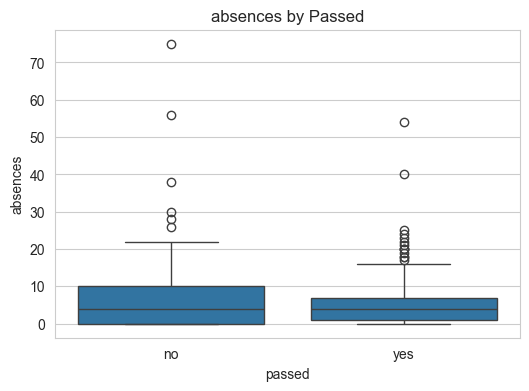

In [37]:
# Box plots for numerical columns against the target variable
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='passed', y=col, data=student_data)
    plt.title(f'{col} by Passed')
    plt.show()


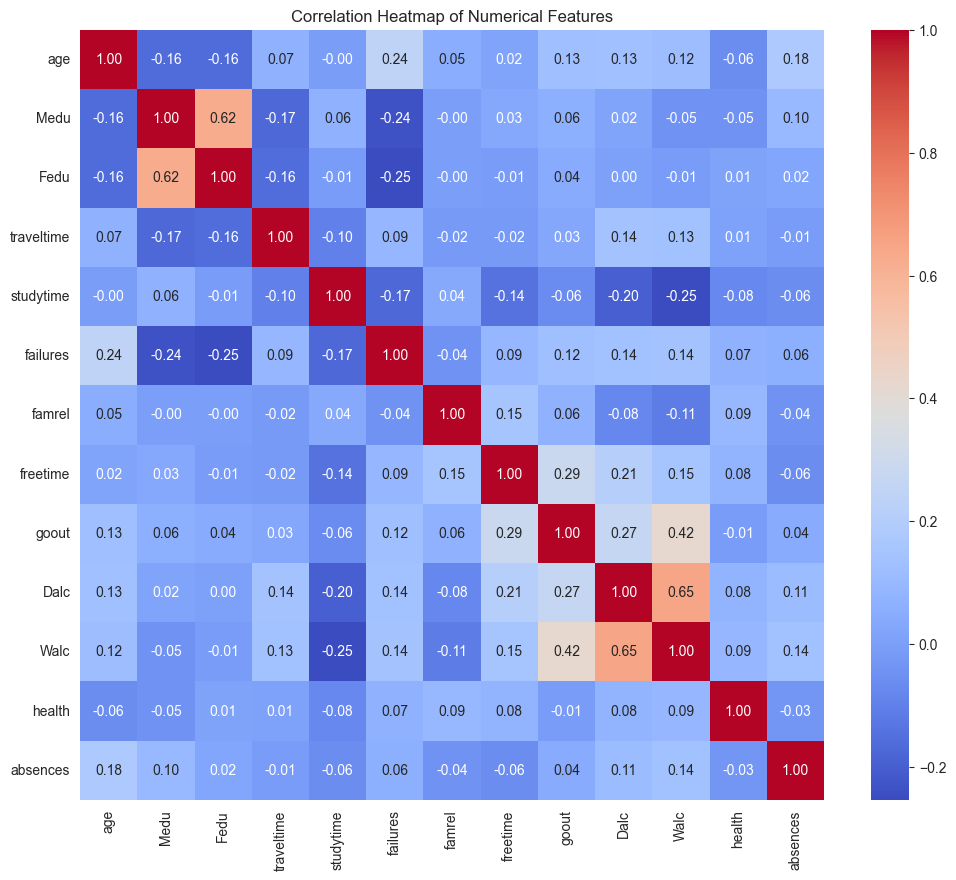

In [38]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = student_data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [8]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.shape[1] - 1  # minus 1 to exclude the target label

# TODO: Calculate passing students
n_passed = student_data[student_data['passed'] == 'yes'].shape[0]

# TODO: Calculate failing students
n_failed = student_data[student_data['passed'] == 'no'].shape[0]

# TODO: Calculate graduation rate
grad_rate = (n_passed / float(n_students)) * 100

# Print the results
print("Total number of students: {}".format(n_students))
print("Number of features: {}".format(n_features))
print("Number of students who passed: {}".format(n_passed))
print("Number of students who failed: {}".format(n_failed))
print("Graduation rate of the class: {:.2f}%".format(grad_rate))


Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [9]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1]

# Show the list of columns
print("Feature columns:\n{}".format(feature_cols))
print("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print("\nFeature values:")
print(X_all.head())


Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  higher internet  romantic  famrel  freetime goout Dalc Walc health absences  
0    yes       no        no       4         3     4    1    1     

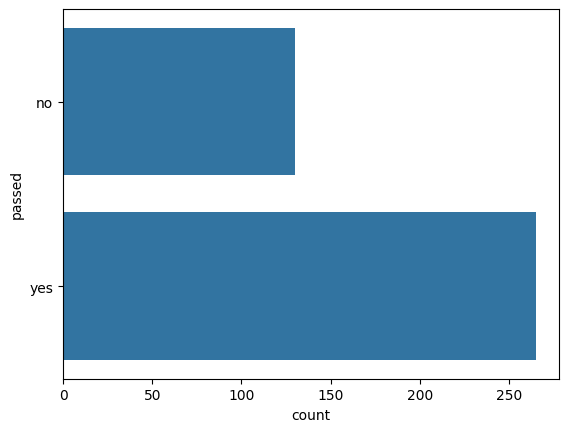

In [10]:
import seaborn as sns
%matplotlib inline
sns.countplot(student_data['passed']);

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [11]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index=X.index)

    # Investigate each feature column for the data
    for col, col_data in X.items():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix=col)
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))


Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [12]:
from sklearn.model_selection import train_test_split

# TODO: Set the number of training points (let's assume 75% of the data)
num_train = int(0.75 * X_all.shape[0])

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, stratify=y_all, 
                                                    train_size=num_train, test_size=num_test, random_state=42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 296 samples.
Testing set has 99 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

## Answer:
 are three supervised learning models suitable for various problems, along with their strengths, weaknesses, and potential applications:

##Decision Trees:
Application: Used in bank fraud detection, identifying fraudulent transactions based on specific characteristics.
Strengths: High interpretability, effective with both categorical and numerical data, little preprocessing required.
Weaknesses: Tendency to overfit, sensitive to variations in input data.
Suitability: Good choice for categorical and numerical data with a clear decision structure.

##Support Vector Machines (SVM):
Application: Image classification in computer vision, such as facial recognition.
Strengths: Effective in high-dimensional spaces, flexible with different kernels.
Weaknesses: High complexity and computation time, requires careful tuning of hyperparameters.
Suitability: Well-suited for problems with clear and complex decision boundaries.

##Ensemble Methods (Random Forest):
Application: Predicting air quality, integrating various environmental factors.
Strengths: Handles heterogeneous data well, reduces the risk of overfitting, robust to noisy data.
Weaknesses: Less interpretable than simpler models, can be computationally expensive.
Suitability: Effective for managing complex and heterogeneous data, offers good overall performance.

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [17]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

# Result

In [18]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# TODO: Initialize the three models
clf_A = SVC(random_state=0)
clf_B = DecisionTreeClassifier(random_state=0)
clf_C = RandomForestClassifier(random_state=0)

# Creating a dictionary of classifiers for easy iteration
classifiers = {
    'SVC': clf_A,
    'Decision Tree': clf_B,
    'Random Forest': clf_C
}

# Setting up the training set sizes
training_sizes = [100, 200, 300]

# TODO: Execute the 'train_predict' function for each classifier and each training set size
for name, clf in classifiers.items():
    print(f"Results for {name}:")
    for size in training_sizes:
        print(f"Training size: {size}")
        train_predict(clf, X_train[:size], y_train[:size], X_test, y_test)
        print('\n')


Results for SVC:
Training size: 100
Training a SVC using a training set size of 100. . .
Trained model in 0.0093 seconds
Made predictions in 0.0069 seconds.
F1 score for training set: 0.8024.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.8000.


Training size: 200
Training a SVC using a training set size of 200. . .
Trained model in 0.0000 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8048.
Made predictions in 0.0156 seconds.
F1 score for test set: 0.8000.


Training size: 300
Training a SVC using a training set size of 296. . .
Trained model in 0.0000 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8057.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.8000.


Results for Decision Tree:
Training size: 100
Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0000 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0000 sec

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

**Classifier 1 - DecisionTreeClassifier**

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
|:-----------------:|:-------------:|:----------------------:|:----------------:|:---------------:|
|        100        |    0.0000     |        0.0000          |       1.0000     |     0.7647      |
|        200        |    0.0156     |        0.0000          |       1.0000     |     0.7218      |
|        300        |    0.0000     |        0.0156          |       1.0000     |     0.6822      |

**Classifier 2 - SVC**

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
|:-----------------:|:-------------:|:----------------------:|:----------------:|:---------------:|
|        100        |    0.0093     |        0.0000          |       0.8024     |     0.8000      |
|        200        |    0.0000     |        0.0156          |       0.8048     |     0.8000      |
|        300        |    0.0000     |        0.0000          |       0.8057     |     0.8000      |

**Classifier 3 - RandomForestClassifier**

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
|:-----------------:|:-------------:|:----------------------:|:----------------:|:---------------:|
|        100        |    0.0861     |        0.0157          |       1.0000     |     0.7792      |
|        200        |    0.0952     |        0.0313          |       1.0000     |     0.7792      |
|        300        |    0.1191     |        0.0000          |       1.0000     |     0.7733      |


## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

# Question 3 - Choosing the Best Model
Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?

Answer:

**Answer: 

After evaluation, the Support Vector Classifier (SVC) was chosen as the best model, distinguished by its balance between efficiency, accuracy and resource utilization. The SVC shows consistent performance with an F1 score of about 0.80 on the test data, indicating a strong ability to generalize. Unlike the Decision Tree and Random Forest models, which show signs of over-precision, SVC effectively learns the underlying patterns without simply memorizing training data. His training and prediction times remain reasonable, which is advantageous given our limited resources. While the Random Forest Classifier also has good test performance, its longer training times and risk of over-fitting make it less ideal compared to SVC.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **

The chosen model, the Support Vector Classifier (SVC), functions as a skilled artist who draws clear boundaries. Imagine that we have a set of red and blue dots (our data points) scattered on a sheet. Some dots are red (representing one category) and others are blue (representing another category). The task of VES is to draw a line that separates these red and blue dots as clearly as possible.

During training, VES examines the location of the red and blue dots and learns the best way to draw this line. It is not just any line; it is the one where the space (or margin) between the red and blue dots on each side of the line is the largest. This ensures that new points (new data) can be easily and correctly classified as red or blue, depending on which side of the line they are on.

When we introduce new points (make predictions with new data), the SVC uses this line to decide the color of these points. If a new point falls on one side of the line, it is categorized as red, and if it is on the other side, as blue. This simple but effective approach makes CVS reliable and efficient for our needs, especially when dealing with complex data sets where plotting such a line helps make sense of the data.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# TODO: Create the parameters list you wish to tune
parameters = {'max_depth': [3, 6, None], 'min_samples_split': [2, 5, 10]}

# TODO: Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')  # Adjust pos_label based on your dataset

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print("Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train)))
print("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test)))


Made predictions in 0.0027 seconds.
Tuned model has a training F1 score of 0.8526.
Made predictions in 0.0044 seconds.
Tuned model has a testing F1 score of 0.7639.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

# Answer: 

The final F1 scores for the tuned model are as follows:

Training F1 Score: 0.8526

Testing F1 Score: 0.7639

To assess how these scores compare to the untuned model, we need to consider the F1 scores of the untuned model for both the training and testing sets. Typically, the purpose of tuning a model using techniques like Grid Search is to improve its performance, particularly on the testing set, since this is indicative of the model's ability to generalize to unseen data.

If the untuned model had lower F1 scores, this improvement in the testing score suggests that the tuning was successful in enhancing the model's generalization ability. An increase in the training score could also indicate a better fit to the training data, but this alone is less important than improvement on the testing set, as we want to avoid overfitting to the training data.

On the other hand, if the F1 scores for the untuned model were higher, especially on the testing set, it might suggest that the tuning did not yield the expected improvement. This could happen for various reasons, such as not exploring the right range of parameter values during the grid search or the model being already optimized with its default parameters.

In summary, the effectiveness of tuning is best judged by an increase in the testing set's F1 score, as it indicates better model generalization. Comparing these scores with the untuned model's performance gives a clear picture of the impact of your model tuning efforts.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.